In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import random

In [2]:
data = torch.tensor([
    [[0,0,0,0],
     [0,1,0,0],
     [0,0,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,1,0],
     [0,0,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,0,0],
     [0,1,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,0,0],
     [0,0,1,0],
     [0,0,0,0]],

    [[0,0,0,0],
     [0,1,1,0],
     [0,0,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,1,0,0],
     [0,1,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,1,0],
     [0,0,1,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,0,0],
     [0,1,1,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,1,0],
     [0,1,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,1,1,0],
     [0,0,1,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,1,0],
     [0,1,1,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,1,0,0],
     [0,1,1,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,1,1,0],
     [0,1,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,1,1,0],
     [0,1,1,0],
     [0,0,0,0]],
], dtype=torch.float) # in_features = 2 

# train_labels = torch.tensor([[1],[1],[1],[1],[2],[2],[2],[2],[2],[2],[3],[3],[3],[3],[4]], dtype=torch.float) # out_features = 1
labels = torch.tensor([[1],[2],[3],[4],[3],[5],[4],[6],[7],[5],[7],[9],[8],[6],[10]], dtype=torch.float) # out_features = 1

In [3]:
data.shape, labels.shape

(torch.Size([15, 4, 4]), torch.Size([15, 1]))

<Figure size 100x100 with 0 Axes>

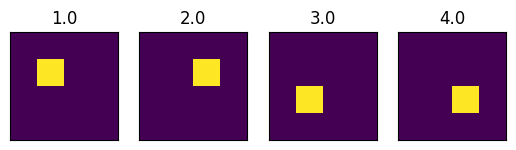

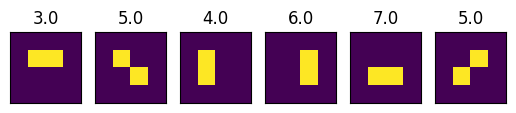

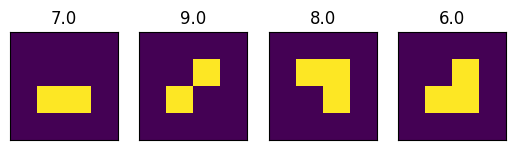

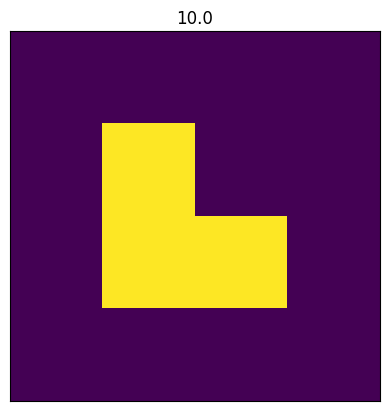

In [4]:
plt.figure(figsize=(1,1))
arr = [4,6,4,1]

for i in range(4):
    fig, axes = plt.subplots(1,arr[i])
    q = 0
    for p in range(i):
        q += arr[p] 
    # print(q)
    for j in range(arr[i]):
        if arr[i] != 1:
            axes[j].imshow(data[i*4+j])
            axes[j].set_xticks([])
            axes[j].set_yticks([])
            axes[j].set_title(str(labels[q + j][0].numpy()))
        else:
            axes.imshow(data[i*4+j])
            axes.set_xticks([])
            axes.set_yticks([])
            axes.set_title(str(labels[q+j][0].numpy()))
        # plt.show()

In [5]:
class Model(nn.Module):
    def __init__(self,in_f,out_f):
        super(Model,self).__init__()

        self.conv1 = nn.Conv2d(in_channels=in_f, out_channels=2, kernel_size=1, stride=1)
        self.conv2 = nn.Conv2d(in_channels=2, out_channels=out_f, kernel_size=1, stride=1)
        # self.relu = nn.ReLU()
        self.avgpool = nn.AvgPool2d(4)
        self.flat = nn.Linear(1, out_f)

    def forward(self,x):
        # print("Model: ")
        # print("Shape of x: ",x.shape)
        x = self.conv1(x)
        # print("Shape of x after conv1: ", x.shape)
        x = self.conv2(x)
        # print("Shape of x after conv2: ", x.shape)
        # x = self.relu(x)
        x = self.avgpool(x)
        # print("Shape of x after avgpool: ", x.shape)
        x = self.flat(x)
        # print("Shape of x after flatten: ", x.shape)
        return x

In [6]:
model = Model(1,1) # image_channel

In [7]:
p = list(model.parameters())
p[0].shape, p[1].shape, p

(torch.Size([2, 1, 1, 1]),
 torch.Size([2]),
 [Parameter containing:
  tensor([[[[-0.7201]]],
  
  
          [[[-0.7611]]]], requires_grad=True),
  Parameter containing:
  tensor([-0.1725,  0.5869], requires_grad=True),
  Parameter containing:
  tensor([[[[-0.6361]],
  
           [[ 0.6488]]]], requires_grad=True),
  Parameter containing:
  tensor([0.1562], requires_grad=True),
  Parameter containing:
  tensor([[0.4464]], requires_grad=True),
  Parameter containing:
  tensor([-0.7471], requires_grad=True)])

In [8]:
from torchsummary import summary
summary(model, input_size=(1,4,4)) # channels, width, height

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 2, 4, 4]               4
            Conv2d-2              [-1, 1, 4, 4]               3
         AvgPool2d-3              [-1, 1, 1, 1]               0
            Linear-4              [-1, 1, 1, 1]               2
Total params: 9
Trainable params: 9
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [9]:
train_size = 10
val_size = 3
test_size = 2

random.seed(42)
sample_index_arr = random.sample(range(0, data.shape[0]), 15)

train_data = torch.from_numpy(np.array([data[sample_index_arr[i]] for i in range(train_size)])).float()
train_labels = torch.from_numpy(np.array([labels[sample_index_arr[i]] for i in range(train_size)])).float()

val_data = torch.from_numpy(np.array([data[sample_index_arr[i+train_size]] for i in range(val_size)])).float()
val_labels = torch.from_numpy(np.array([labels[sample_index_arr[i+train_size]] for i in range(val_size)])).float()

test_data = torch.from_numpy(np.array([data[sample_index_arr[i+train_size+val_size]] for i in range(test_size)])).float()
test_labels = torch.from_numpy(np.array([labels[sample_index_arr[i+train_size+val_size]] for i in range(test_size)])).float()

train_data.shape, val_data.shape, test_data.shape

(torch.Size([10, 4, 4]), torch.Size([3, 4, 4]), torch.Size([2, 4, 4]))

In [10]:
loss_fn = nn.L1Loss()
# optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# loss_fn = nn.CrossEntropyLoss()

In [11]:

y_pred = model(train_data.unsqueeze(dim=1))
# y_pred.squeeze(dim=0), train_labels[1], loss_fn(y_pred.squeeze(dim=0), train_labels[0])
y_pred.squeeze(dim=1).squeeze(dim=1).shape

torch.Size([10, 1])

# Gradient descent
Since I am calculating grad on every data each iteration

In [12]:
epochs = 1000

index = []
train_loss = []
val_loss = []

for i in range(epochs):
    model.train()
    y_pred = model(train_data.unsqueeze(dim=1))
    loss = loss_fn(y_pred.squeeze(dim=1).squeeze(dim=1), train_labels)
    with torch.no_grad():
        train_loss.append(loss_fn(y_pred.squeeze(dim=1).squeeze(dim=1), train_labels).numpy())
    index.append(len(index))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()

    with torch.no_grad():
        y_pred_val = model(val_data.unsqueeze(dim=1))
        loss_val = loss_fn(y_pred_val.squeeze(dim=1).squeeze(dim=1), val_labels)
        val_loss.append(loss_val.numpy())

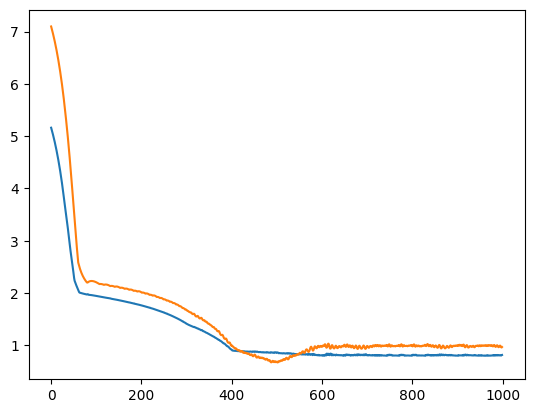

In [13]:
## Plotting 

plt.plot(index, train_loss)
plt.plot(index, val_loss)

In [14]:
with torch.no_grad():
    y_pred = model(test_data.unsqueeze(dim=1))
test_labels, y_pred.squeeze(dim=1).squeeze(dim=1)

(tensor([[6.],
         [7.]]),
 tensor([[7.9366],
         [4.9749]]))

[[0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


    A c t u a l  C l a s s
P
r
e
d
i
c
t
e
d
 
c
l
a
s
s





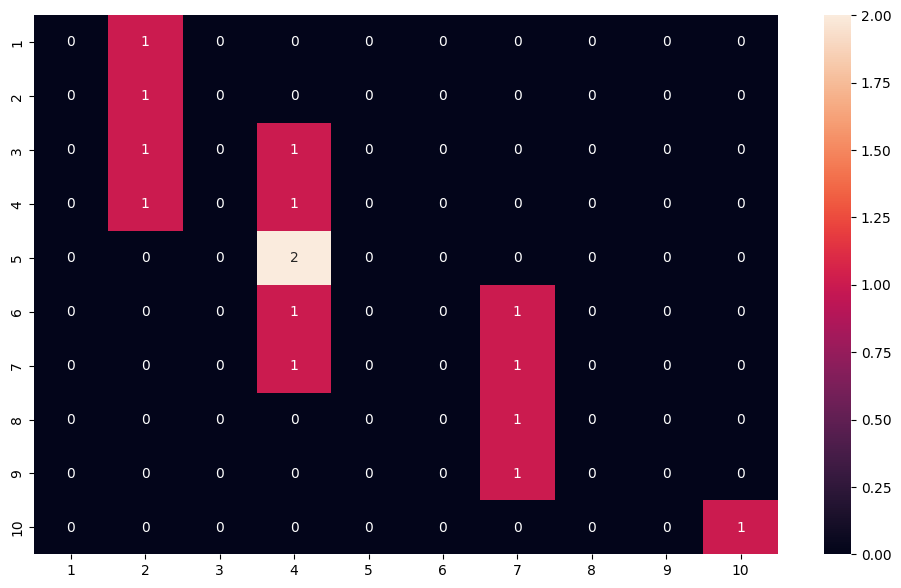

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

classes = [1,2,3,4,5,6,7,8,9,10]

with torch.no_grad():
    cf_matrix = confusion_matrix(labels, torch.floor(model(data.unsqueeze(dim=1)).squeeze(dim=1).squeeze(dim=1)).numpy())
    print(cf_matrix)
    df_cm = pd.DataFrame(cf_matrix , index = [i for i in classes],
                         columns = [i for i in classes])
    plt.figure(figsize = (12,7))
    plt.xlabel("Actual Class")
    plt.ylabel("Predicted Class")
    sn.heatmap(df_cm, annot=True)
    plt.plot()
print("\n\n    A c t u a l  C l a s s")
for i in "Predicted class":
    print(i)
print("\n\n")

In [16]:
with torch.no_grad():
    p1 = torch.floor(model(data.unsqueeze(dim=1)).squeeze(dim=1).squeeze(dim=1).squeeze(dim=1)).numpy()
labels.squeeze(dim=1)

p2 = []

for i in range(p1.shape[0]):
    p2.append([0.2 if p1[i] == j+1 else 0.089 for j in range(10)])

p2 = torch.from_numpy(np.array(p2))

labels_temp = labels - 1

p2.shape,labels_temp.squeeze(dim=1).int().shape

(torch.Size([15, 10]), torch.Size([15]))

In [20]:
import torch
from ignite.metrics import ClassificationReport
from ignite.engine import Engine

# Example multi-class prediction with 10 classes
y_true = torch.tensor([2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 9])  # Shape: [15]
# Note: Changed the last value from 10 to 9 because PyTorch uses 0-based indexing

# Predicted logits for 10 classes (Shape: [15, 10])
y_pred = torch.tensor([
    [0.1, 0.05, 0.8, 0.01, 0.02, 0.01, 0.005, 0.003, 0.004, 0.007],
    [0.15, 0.04, 0.75, 0.01, 0.02, 0.015, 0.003, 0.002, 0.005, 0.01],
    [0.12, 0.045, 0.78, 0.005, 0.01, 0.02, 0.004, 0.002, 0.008, 0.01],
    [0.1, 0.05, 0.8, 0.01, 0.02, 0.01, 0.005, 0.003, 0.004, 0.007],
    [0.03, 0.02, 0.1, 0.05, 0.65, 0.08, 0.02, 0.01, 0.01, 0.02],
    [0.02, 0.01, 0.12, 0.03, 0.7, 0.07, 0.03, 0.01, 0.01, 0.01],
    [0.03, 0.02, 0.1, 0.05, 0.65, 0.08, 0.02, 0.01, 0.01, 0.02],
    [0.01, 0.01, 0.15, 0.04, 0.7, 0.06, 0.03, 0.02, 0.005, 0.01],
    [0.03, 0.02, 0.1, 0.05, 0.65, 0.08, 0.02, 0.01, 0.01, 0.02],
    [0.02, 0.01, 0.12, 0.03, 0.7, 0.07, 0.03, 0.01, 0.01, 0.01],
    [0.04, 0.05, 0.07, 0.03, 0.2, 0.05, 0.5, 0.04, 0.02, 0.04],
    [0.04, 0.05, 0.07, 0.03, 0.2, 0.05, 0.5, 0.04, 0.02, 0.04],
    [0.03, 0.04, 0.06, 0.02, 0.15, 0.05, 0.55, 0.03, 0.02, 0.03],
    [0.04, 0.05, 0.07, 0.03, 0.2, 0.05, 0.5, 0.04, 0.02, 0.04],
    [0.03, 0.04, 0.06, 0.02, 0.15, 0.05, 0.55, 0.03, 0.02, 0.03]
])

# Dummy engine for demonstration
def process_function(engine, batch):
    return batch

# Create an evaluator
default_evaluator = Engine(process_function)

metric = ClassificationReport(output_dict=True)
metric.attach(default_evaluator, "cr")

with torch.no_grad():
    state = default_evaluator.run([[y_pred, y_true]])

print(state.metrics["cr"].keys())
for i in state.metrics["cr"].keys():
    print(state.metrics["cr"][i])
print(state.metrics["cr"]["macro avg"])

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'macro avg'])
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 1.0, 'recall': 1.0, 'f1-score': 0.9999999999999996}
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 0.1, 'recall': 0.1, 'f1-score': 0.09999999999999995}
{'precision': 0.1, 'recall': 0.1, 'f1-score': 0.09999999999999995}


In [21]:
from ignite.metrics import ClassificationReport
from ignite.engine import Engine, Events

def inference(engine, batch):
    return batch

default_evaluator = Engine(inference)

metric = ClassificationReport(output_dict=True)
metric.attach(default_evaluator, "cr")

with torch.no_grad():
    state = default_evaluator.run([[p2,labels_temp.squeeze(dim=1).int()]])
print(state.metrics["cr"].keys())
for i in state.metrics["cr"].keys():
    print(state.metrics["cr"][i])
print(state.metrics["cr"]["macro avg"])

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'macro avg'])
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 0.25, 'recall': 1.0, 'f1-score': 0.39999999999999963}
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 0.16666666666666666, 'recall': 0.5, 'f1-score': 0.24999999999999964}
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 0.25, 'recall': 0.5, 'f1-score': 0.33333333333333287}
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
{'precision': 1.0, 'recall': 1.0, 'f1-score': 0.9999999999999996}
{'precision': 0.16666666666666669, 'recall': 0.3, 'f1-score': 0.19833333333333317}
{'precision': 0.16666666666666669, 'recall': 0.3, 'f1-score': 0.19833333333333317}


/home/groupe/vs_code/jupyter/env/lib/python3.11/site-packages/ignite/metrics/precision.py:50: RuntimeWarning: `y` should be of dtype long when entry type is multiclass
  warnings.warn("`y` should be of dtype long when entry type is multiclass", RuntimeWarning)


# SGD 
one data at one iteration

In [ ]:
epochs = 100

for i in range(epochs):
    for j in range(15):
        model.train()
        y_pred = model(train_data[j].unsqueeze(dim=0))
        loss = loss_fn(y_pred.squeeze(dim=1), train_labels)
    
        optimizer.zero_grad()
    
        loss.backward()
    
        optimizer.step()

    model.eval()

In [ ]:
with torch.no_grad():
    y_pred = model(train_data.unsqueeze(dim=1))
train_labels, y_pred.squeeze(dim=1).squeeze(dim=1)

# batch gradient descent

In [ ]:
epochs = 100
batch_size = 4

for i in range(epochs):
    # for j in range(15):
    data_temp = []
    label_temp = []
    for j in range(batch_size):
        if j+(i%4)*batch_size >= 15 :
            break
        data_temp.append(train_data[j+(i%4)*batch_size])
        label_temp.append(train_labels[j+(i%4)*batch_size])
    data_temp = torch.from_numpy(np.array(data_temp)).float()
    label_temp = torch.from_numpy(np.array(label_temp)).float()
    model.train()
    y_pred = model(data_temp.unsqueeze(dim=1))
    loss = loss_fn(y_pred.squeeze(dim=1).squeeze(dim=1), label_temp)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()

In [ ]:
with torch.no_grad():
    y_pred = model(train_data.unsqueeze(dim=1))
train_labels, y_pred.squeeze(dim=1).squeeze(dim=1)